In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
sns.set()

In [75]:
states = pd.read_excel('state_data.xlsx', skiprows=4)

In [33]:
states.columns= ['Fips', 'state', 'year', 'population', 'total_labor_force', 'percent_labor_force', 'total_employment', 'percent_employment', 'total_unemployment', 'percent_unemployment']
states.head()

,Fips,state,year,population,total_labor_force,percent_labor_force,total_employment,percent_employment,total_unemployment,percent_unemployment
0,NaN,NaN,NaN,NaN,NaN,NaN,Total,Percent of population,Total,Rate
1,NaN,NaN,NaN,NaN,NaN,NaN,Labor force,NaN,level,rate
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,Alabama,1976.0,2632667.0,1501284.0,57.0,1399080,53.1,102204,6.8
4,2.0,Alaska,1976.0,239917.0,163570.0,68.2,151190,63,12380,7.6


In [34]:
states.drop([0,1,2], inplace=True)
states.drop('Fips', axis=1, inplace=True)

In [35]:
states.head()

,state,year,population,total_labor_force,percent_labor_force,total_employment,percent_employment,total_unemployment,percent_unemployment
3,Alabama,1976.0,2632667.0,1501284.0,57.0,1399080,53.1,102204,6.8
4,Alaska,1976.0,239917.0,163570.0,68.2,151190,63,12380,7.6
5,Arizona,1976.0,1650917.0,987060.0,59.8,890988,54,96072,9.7
6,Arkansas,1976.0,1546583.0,891608.0,57.7,829394,53.6,62214,7
7,California,1976.0,15823750.0,9899372.0,62.6,8994291,56.8,905081,9.1


In [36]:
states = states[(~states.state.str.contains('County')) & (~states.state.str.contains('City'))]

In [37]:
states['year'] = states.year.astype(int)

In [38]:
def createDataDict(year, column):
    df = states.loc[states.year == year, :]
    dct = {}
    for index, row in df.iterrows():
        dct[row['state']] = row[column]
    return dct

In [69]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import matplotlib
import matplotlib.cm as cm

def plotStateData(dataDict, title, minima=None, maxima=None):
    # Lambert Conformal map of lower 48 states.
   
    lst = [v for k, v in dataDict.items()]   
    if not minima:
        minima = min(lst)
        maxima = max(lst)
    
    norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.hot)
        
    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    # draw state boundaries.
    # data from U.S Census Bureau
    # http://www.census.gov/geo/www/cob/st2000.html
    shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
    # population density by state from
    # http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
    # choose  color for each state based on population density.
    colors={}
    statenames=[]
    cmap = plt.cm.hot # use 'hot' colormap
    vmin = 0; vmax = 400 # set range.

    for shapedict in m.states_info:
        statename = shapedict['NAME']
         # skip DC and Puerto Rico.
        if statename not in ['District of Columbia','Puerto Rico']:
            val = dataDict[statename]
            # calling colormap with value between 0 and 1 returns
            # rgba value.  Invert color range (hot colors are high
            # population), take sqrt root to spread out colors more.
            colors[statename] = mapper.to_rgba(val) #= cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
            #colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
        statenames.append(statename)
    # cycle through state names, color each one.
    ax = plt.gca() # get current axes instance
    for nshape,seg in enumerate(m.states):
        # skip DC and Puerto Rico.
        if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
            color = rgb2hex(colors[statenames[nshape]])
            poly = Polygon(seg,facecolor=color,edgecolor=color)
            ax.add_patch(poly)
    # draw meridians and parallels.
    m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
    m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])
    mapper.set_array(lst)
    m.colorbar(mapper)
    plt.title(title)
    plt.show()



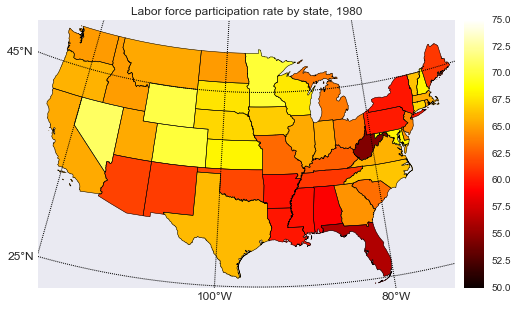

In [71]:
eightyLf = createDataDict(1980, 'percent_labor_force')
plotStateData(eightyLf, 'Labor force participation rate by state, 1980', 50, 75)

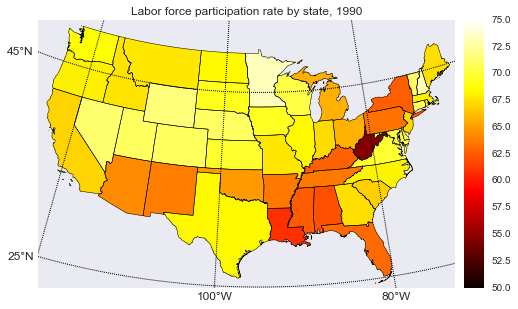

In [72]:
ninetyLf = createDataDict(1990, 'percent_labor_force')
plotStateData(ninetyLf, 'Labor force participation rate by state, 1990', 50, 75)

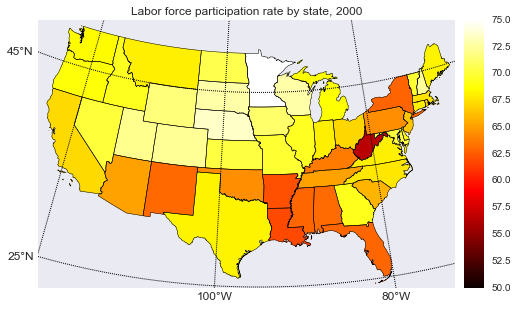

In [73]:
thousandLf = createDataDict(2000, 'percent_labor_force')
plotStateData(thousandLf, 'Labor force participation rate by state, 2000', 50, 75)

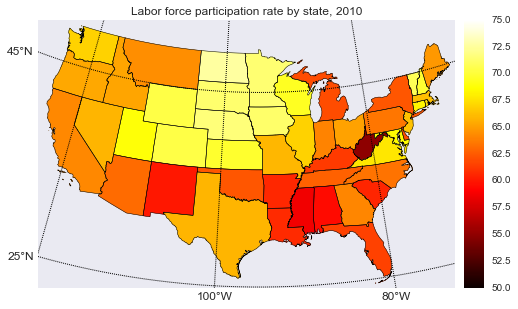

In [74]:
tenLf = createDataDict(2010, 'percent_labor_force')
plotStateData(tenLf, 'Labor force participation rate by state, 2010', 50, 75)

In [44]:
tenLaborForce = states.loc[states.year == 2010, ['percent_labor_force', 'state']]
eightyLaborForce = states.loc[states.year == 1980, ['percent_labor_force','state']]
changeLaborForce = tenLaborForce - eightyLaborForce

In [45]:
tenLaborForce['change'] = tenLaborForce.percent_labor_force.values - eightyLaborForce.percent_labor_force.values

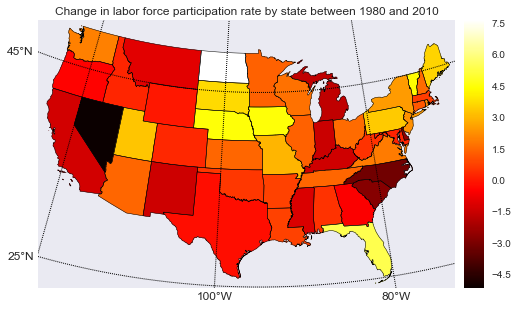

In [46]:
changeDct = {}
for index, row in tenLaborForce.iterrows():
        changeDct[row['state']] = row['change']
plotStateData(changeDct, 'Change in labor force participation rate by state between 1980 and 2010')

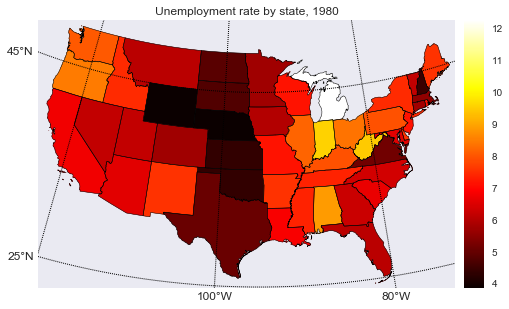

In [47]:
eightyUe = createDataDict(1980, 'percent_unemployment')
plotStateData(eightyUe, 'Unemployment rate by state, 1980')

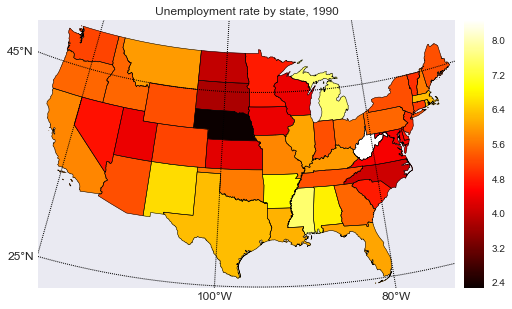

In [48]:
ninetyUe = createDataDict(1990, 'percent_unemployment')
plotStateData(ninetyUe, 'Unemployment rate by state, 1990')

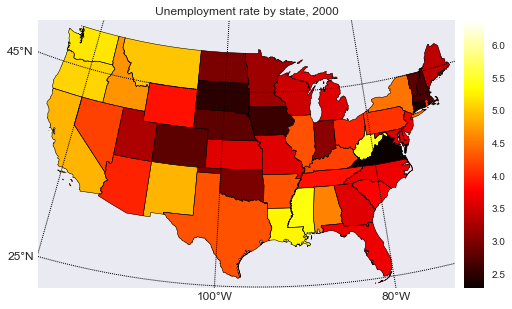

In [49]:
thousandUe = createDataDict(2000, 'percent_unemployment')
plotStateData(thousandUe, 'Unemployment rate by state, 2000')

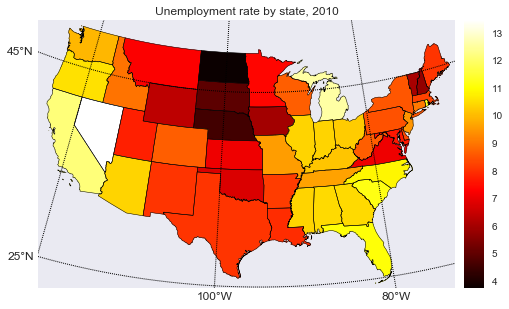

In [50]:
tenUe = createDataDict(2010, 'percent_unemployment')
plotStateData(tenUe, 'Unemployment rate by state, 2010')

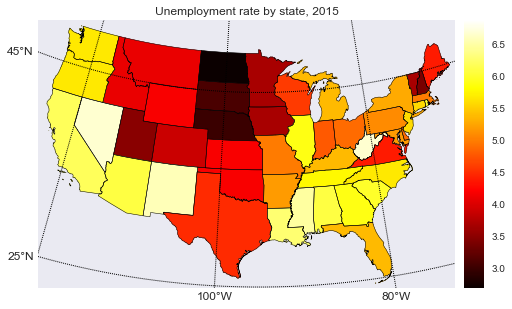

In [51]:
fifteenUe = createDataDict(2015, 'percent_unemployment')
plotStateData(fifteenUe, 'Unemployment rate by state, 2015')

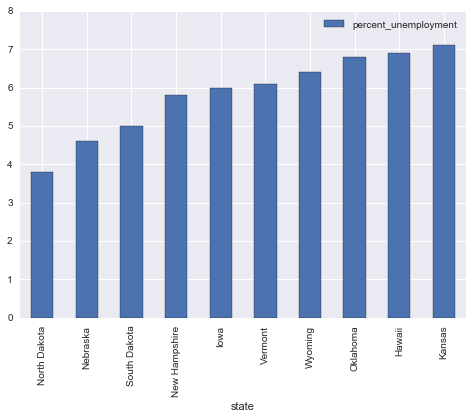

In [52]:
states.loc[states.year == 2010, ['state', 'percent_unemployment']].sort_values(by='percent_unemployment',ascending=True).iloc[:10, :].plot(kind='bar', x='state',y='percent_unemployment' )

In [53]:
nineLaborUe = states.loc[states.year == 2009, ['percent_unemployment', 'state']]
fifteenUe = states.loc[states.year == 2015, ['percent_unemployment','state']]
fifteenUe['change'] =  fifteenUe.percent_unemployment.values - nineLaborUe.percent_unemployment.values


In [54]:
fifteenUe['abs'] = abs(fifteenUe.change)

In [55]:
nineLaborUe.head()

,percent_unemployment,state
1752,11,Alabama
1753,7.7,Alaska
1754,9.9,Arizona
1755,7.8,Arkansas
1756,11.2,California


In [56]:
fifteenUe.head()

,percent_unemployment,state,change,abs
2070,6.1,Alabama,-4.9,4.9
2071,6.5,Alaska,-1.2,1.2
2072,6.1,Arizona,-3.8,3.8
2073,5.2,Arkansas,-2.6,2.6
2074,6.2,California,-5,5


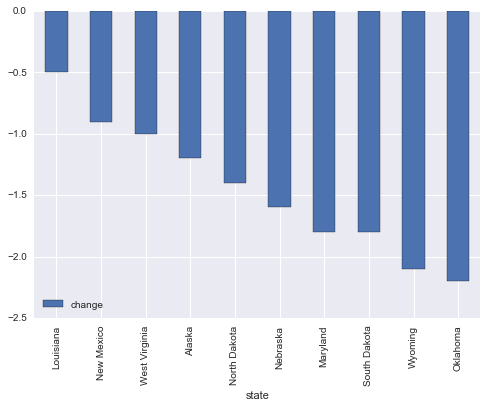

In [57]:
fifteenUe.sort_values(by='abs').iloc[:10,:].plot(kind='bar', x='state', y='change')

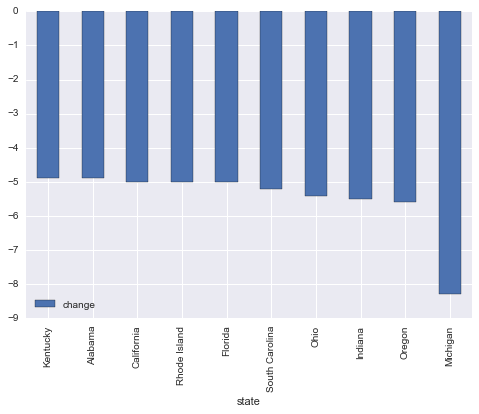

In [58]:
fifteenUe.sort_values(by='abs').iloc[-10:,:].plot(kind='bar', x='state', y='change')

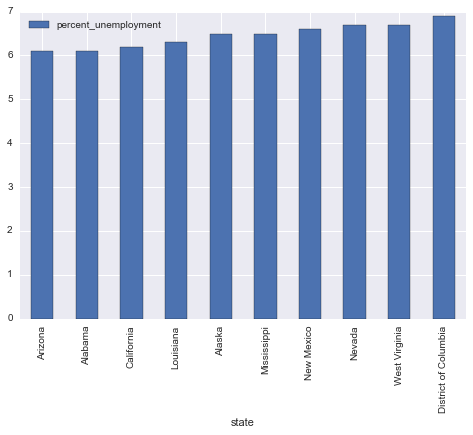

In [59]:
fifteenUe.sort_values(by='percent_unemployment').iloc[-10:,:].plot(kind='bar', x='state', y='percent_unemployment')